In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
%matplotlib inline
sns.set()
import sklearn
import warnings
warnings.filterwarnings("ignore") #REMOVES ANNOYING WARNINGS
from collections import Counter

In [2]:
### Random seed
seed = np.random.default_rng(2021)

In [3]:
pd.set_option('display.max_columns', None) #VIEW ALL COLUMNS BECAUSE SOME ARE HIDDEN BY DEFAULT

In [4]:
df_summer = pd.read_csv("summer.csv")

In [5]:
df_summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [6]:
df_summer["season"] = "summer" #adding a season column

In [7]:
df_summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,season
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,summer
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,summer
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,summer
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,summer
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,summer


In [8]:
df_winter = pd.read_csv("winter.csv")

In [9]:
df_winter["season"] = "winter" #adding a season column

In [10]:
df_winter.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,season
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze,winter
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze,winter
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze,winter
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze,winter
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold,winter


In [11]:
df_total = df_summer.append(df_winter,ignore_index=True)#Merging the two datasets, winter and summer with the season column as a new feature

In [12]:
df_total.dropna(inplace=True)

In [13]:
df_total.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,season
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,summer
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,summer
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,summer
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,summer
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,summer


In [14]:
df_total.describe(include="all")

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,season
count,36931.000000,36931,36931,36931,36931,36931,36931,36931,36931,36931
unique,NaN,41,48,80,26494,148,2,733,3,2
top,NaN,London,Aquatics,Athletics,"PHELPS, Michael",USA,Men,Ice Hockey,Gold,summer
freq,NaN,3563,4170,3637,22,5238,26688,1563,12405,31161
mean,1972.957407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,32.447047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1896.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1952.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1980.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_total["Event"].unique()

array(['100M Freestyle', '100M Freestyle For Sailors', '1200M Freestyle',
       '400M Freestyle', '100M', '110M Hurdles', '1500M', '400M', '800M',
       'Discus Throw', 'High Jump', 'Long Jump', 'Marathon', 'Pole Vault',
       'Shot Put', 'Triple Jump', 'Individual Road Race', '100KM', '10KM',
       '12-Hour Race', '1KM Time Trial', 'Sprint Indivual',
       'Foil Individual', 'Foil, Masters', 'Sabre Individual',
       'Horizontal Bar', 'Parallel Bars', 'Pommel Horse', 'Rings',
       'Rope Climbing', 'Team, Horizontal Bar', 'Team, Parallel Bars',
       'Vault', '25M Army Pistol', '25M Rapid Fire Pistol (60 Shots)',
       '50M Pistol (60 Shots)', 'Army Rifle, 200M', 'Army Rifle, 300M',
       'Doubles', 'Singles', 'Heavyweight - One Hand Lift',
       'Heavyweight - Two Hand Lift', 'Open Event', '1500M Freestyle',
       '200M Backstroke', '200M Freestyle', '200M Obstacle Event',
       '200M Team Swimming', '4000M Freestyle', 'Underwater Swimming',
       'Water Polo', 'Au Chap

In [16]:
Event = df_total["Event"].unique()
Event.sort()
Event

array(['+ 100KG', '+ 100KG (Heavyweight)', '+ 100KG (Super Heavyweight)',
       '+ 105KG', '+ 108KG, Total (Super Heavyweight)',
       '+ 110KG, Total (Super Heavyweight)', '+ 67 KG',
       '+ 71.67KG (Heavyweight)', '+ 72KG (Heavyweight)',
       '+ 73KG (Heavyweight)', '+ 75KG', '+ 78KG', '+ 78KG (Heavyweight)',
       '+ 79.38KG (Heavyweight)', '+ 80 KG', '+ 80KG (Heavyweight)',
       '+ 81KG (Heavyweight)', '+ 82.5KG (Super Heavyweight)',
       '+ 82.5KG, One-Two Hand 3 Events (Heavyweight)',
       '+ 82.5KG, One-Two Hand 5 Events (Heavyweight)',
       '+ 82.5KG, Total (Heavyweight)', '+ 82KG (Super Heavyweight)',
       '+ 87KG (Heavyweight)', '+ 87KG (Super Heavyweight)',
       '+ 90KG, Total (Heavyweight)', '+ 91KG',
       '+ 91KG (Super Heavyweight)', '+ 93KG (Heavyweight)',
       '+ 93KG (Super Heavyweight)', '+ 95KG (Heavyweight)',
       '+ 97KG (Heavyweight)', '+ 97KG (Super Heavyweight)', '+105KG',
       '+75KG', '- 47.63KG (Flyweight)', '- 47.6KG (Light-Flyweig

In [17]:
df_total["Discipline"].unique()

array(['Swimming', 'Athletics', 'Cycling Road', 'Cycling Track',
       'Fencing', 'Artistic G.', 'Shooting', 'Tennis', 'Weightlifting',
       'Wrestling Gre-R', 'Water polo', 'Archery', 'Basque Pelota',
       'Cricket', 'Croquet', 'Jumping', 'Football', 'Golf', 'Polo',
       'Rowing', 'Rugby', 'Sailing', 'Tug of War', 'Diving', 'Boxing',
       'Lacrosse', 'Roque', 'Wrestling Free.', 'Hockey', 'Jeu de Paume',
       'Rackets', 'Figure skating', 'Water Motorspor', 'Dressage',
       'Eventing', 'Modern Pentath.', 'Vaulting', 'Ice Hockey',
       'Basketball', 'Canoe / Kayak F', 'Handball', 'Judo', 'Volleyball',
       'Canoe / Kayak S', 'Synchronized S.', 'Rhythmic G.',
       'Table Tennis', 'Badminton', 'Baseball', 'Mountain Bike',
       'Softball', 'Beach volley.', 'Trampoline', 'Taekwondo',
       'Triathlon', 'BMX', 'Marathon swimming', 'Synchronized Swimming',
       'Water Polo', 'Canoe Slalom', 'Canoe Sprint', 'Cycling BMX',
       'Gymnastics Artistic', 'Gymnastics Rhythmi

In [18]:
df_total["Discipline"] = df_total["Discipline"].str.lower()#make all instances small letter to easily manage

In [19]:
Discipline = df_total["Discipline"].unique()
Discipline.sort()
Discipline

array(['alpine skiing', 'archery', 'artistic g.', 'athletics',
       'badminton', 'baseball', 'basketball', 'basque pelota',
       'beach volley.', 'beach volleyball', 'biathlon', 'bmx',
       'bobsleigh', 'boxing', 'canoe / kayak f', 'canoe / kayak s',
       'canoe slalom', 'canoe sprint', 'cricket', 'croquet',
       'cross country skiing', 'curling', 'cycling bmx', 'cycling road',
       'cycling track', 'diving', 'dressage', 'eventing', 'fencing',
       'figure skating', 'football', 'freestyle skiing', 'golf',
       'gymnastics artistic', 'gymnastics rhythmic', 'handball', 'hockey',
       'ice hockey', 'jeu de paume', 'judo', 'jumping', 'lacrosse',
       'luge', 'marathon swimming', 'modern pentath.',
       'modern pentathlon', 'mountain bike', 'nordic combined', 'polo',
       'rackets', 'rhythmic g.', 'roque', 'rowing', 'rugby', 'sailing',
       'shooting', 'short track speed skating', 'skeleton', 'ski jumping',
       'snowboard', 'softball', 'speed skating', 'swimming

In [20]:
df_total = df_total.replace('beach volley.', 'beach volleyball')
df_total = df_total.replace('bmx', 'cycling bmx')
df_total = df_total.replace('artistic g.', 'gymnastics artistic')
df_total = df_total.replace('rhythmic g.', 'gymnastics rhythmic')
df_total = df_total.replace('modern pentath.', 'modern pentathlon')
df_total = df_total.replace('synchronized s.', 'synchronized swimming')
df_total = df_total.replace('wrestling free.', 'wrestling freestyle')
df_total = df_total.replace('wrestling gre-r', 'wrestling greco roman')

In [21]:
x=df_total.drop(["Medal", 'Athlete'],axis=1) #separating the dependent and independent variable columns

In [22]:
x.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Country       0
Gender        0
Event         0
season        0
dtype: int64

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
lb=LabelEncoder()

In [25]:
for col in x.columns:
    x[col] = lb.fit_transform(x[col])#transforming all the categorical to numerical data

In [26]:
x

,Year,City,Sport,Discipline,Country,Gender,Event,season
0,0,3,0,57,58,0,79,0
1,0,3,0,57,7,0,79,0
2,0,3,0,57,52,0,80,0
3,0,3,0,57,52,0,80,0
4,0,3,0,57,52,0,80,0
...,...,...,...,...,...,...,...,...
36930,32,32,37,54,47,1,654,1
36931,32,32,37,54,140,1,654,1
36932,32,32,37,54,21,1,655,1
36933,32,32,37,54,31,1,655,1


In [27]:
x_corr = x.corr(method = 'spearman')

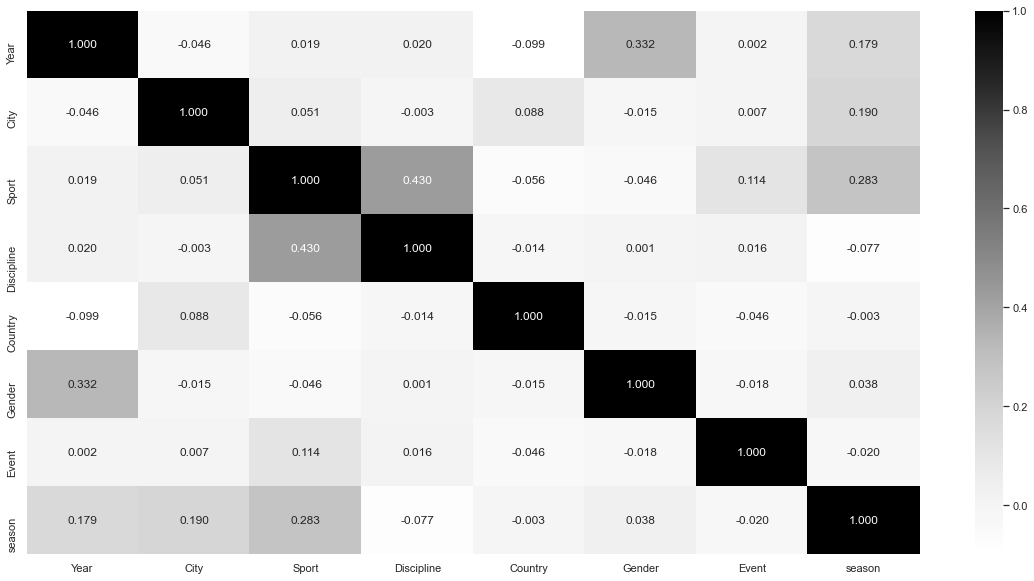

In [28]:
plt.figure(figsize = (20, 10))
sns.heatmap(x_corr, annot = True, fmt = '.3f', cmap = 'Greys')
plt.show(); plt.close()

In [29]:
lb2 = LabelEncoder()

In [30]:
y_clean = lb2.fit_transform(df_total.iloc[:,-2])

In [31]:
print(Counter(y_clean))

Counter({1: 12405, 0: 12288, 2: 12238})


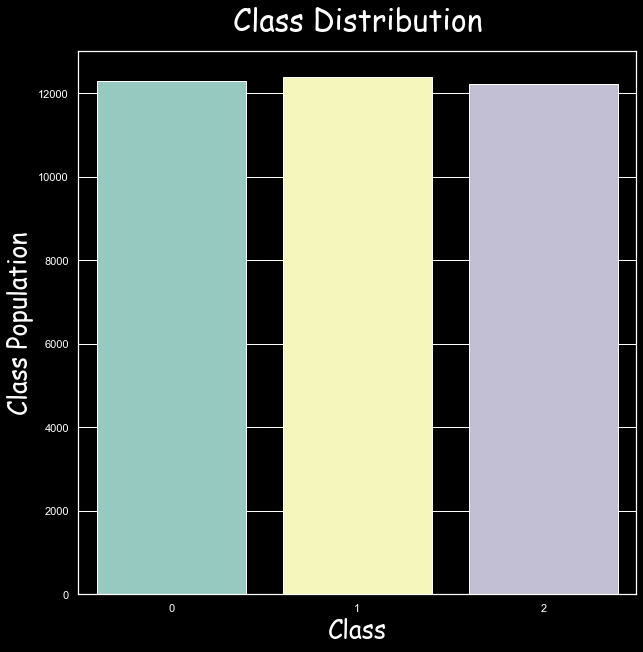

In [32]:
d = Counter(y_clean)
plt.style.use('dark_background')
plt.figure(figsize = (10, 10))

plt.xlabel('Class', fontsize = 25, fontfamily = 'fantasy')
plt.ylabel('Class Population', fontsize = 25, fontfamily = 'fantasy')
plt.title('Class Distribution', fontsize = 30, pad = 20, fontfamily = 'fantasy')

sns.barplot([0, 1, 2], [d[0], d[1], d[2]])
plt.show()

The classes are relatively well-balanced.

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y_clean, stratify = y_clean, test_size=0.2,random_state =50)

In [35]:
from sklearn.metrics import confusion_matrix # TOOLS TO CHECK ACCURACY
from sklearn import metrics

NOW LET'S TRY DIFFERENT ALGORITHMS THAT SUPPORT MULTICLASS CLASSIFICATION

# LOGISTIC REGRESSION

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
classifier_log = LogisticRegression(C = 2.0, solver = 'newton-cg', random_state =0,max_iter =200)

In [38]:
classifier_log.fit(x_train,y_train)

LogisticRegression(C=2.0, max_iter=200, random_state=0, solver='newton-cg')

In [39]:
y_pred_log = classifier_log.predict(x_test)

In [40]:
confusion_matrix(y_test,y_pred_log)

array([[1005, 1011,  442],
       [ 819, 1160,  502],
       [ 936,  999,  513]], dtype=int64)

In [41]:
metrics.f1_score(y_train,classifier_log.predict(x_train),average="macro")

0.35677441364330553

In [42]:
metrics.f1_score(y_test,y_pred_log,average="macro")

0.35283064736979525

# K NEIGHBORS CLASSIFIER

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
classifier_KNN = KNeighborsClassifier(weights = 'distance')

In [45]:
classifier_KNN.fit(x_train,y_train)

KNeighborsClassifier(weights='distance')

In [46]:
y_pred_KNN = classifier_KNN.predict(x_test)

In [47]:
confusion_matrix(y_test,y_pred_KNN)

array([[1743,  401,  314],
       [ 377, 1779,  325],
       [ 394,  368, 1686]], dtype=int64)

True positives are the values on the diagonal

In [48]:
metrics.f1_score(y_train,classifier_KNN.predict(x_train),average="macro")

0.9450086449438966

In [49]:
metrics.f1_score(y_test,y_pred_KNN,average="macro") # THE CLOSER THE F1 SCORE TO 1, THE MORE SIGNIFICANT THE MODEL

0.7050322477600592

# NAIVE BAYES CLASSIFIER

In [50]:
from sklearn.naive_bayes import GaussianNB

In [51]:
classifier_naive = GaussianNB(var_smoothing=1e-09)

In [52]:
classifier_naive.fit(x_train,y_train)

GaussianNB()

In [53]:
y_pred_naive = classifier_naive.predict(x_test)

In [54]:
confusion_matrix(y_test,y_pred_naive)

array([[1204,  934,  320],
       [1020, 1101,  360],
       [1161,  918,  369]], dtype=int64)

In [55]:
metrics.f1_score(y_train,classifier_naive.predict(x_train),average="macro")

0.345896977576526

In [56]:
metrics.f1_score(y_test,y_pred_naive,average="macro")

0.3427938161155449

# DECISION TREE CLASSIFIER

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
classifier_dectree = DecisionTreeClassifier(criterion = "entropy",random_state =0)

In [59]:
classifier_dectree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [60]:
y_pred_dectree = classifier_dectree.predict(x_test)

In [61]:
confusion_matrix(y_test,y_pred_dectree)

array([[1750,  412,  296],
       [ 387, 1785,  309],
       [ 416,  373, 1659]], dtype=int64)

In [62]:
metrics.f1_score(y_train,classifier_dectree.predict(x_train),average="macro")

0.945188832369552

In [63]:
metrics.f1_score(y_test,y_pred_dectree,average="macro")

0.7031379025334972

In [64]:
print(metrics.classification_report(y_test,y_pred_dectree))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70      2458
           1       0.69      0.72      0.71      2481
           2       0.73      0.68      0.70      2448

    accuracy                           0.70      7387
   macro avg       0.70      0.70      0.70      7387
weighted avg       0.70      0.70      0.70      7387



# RANDOM FOREST CLASSIFIER

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
classifier_forest = RandomForestClassifier(criterion="entropy",max_depth=None,
                                           max_features= 5, min_samples_leaf= 1,
                                           min_samples_split= 2,n_estimators=400, warm_start = True)

In [67]:
classifier_forest.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_features=5, n_estimators=400,
                       warm_start=True)

In [68]:
y_pred_forest = classifier_forest.predict(x_test)

In [69]:
metrics.f1_score(y_train,classifier_forest.predict(x_train),average="macro")

0.9453260144391432

In [70]:
random_forest_score = metrics.f1_score(y_test,y_pred_forest,average="macro")
random_forest_score

0.7007068943105391

In [71]:
confusion_matrix(y_test,y_pred_forest)

array([[1727,  367,  364],
       [ 353, 1781,  347],
       [ 403,  376, 1669]], dtype=int64)

In [72]:
print(metrics.classification_report(y_test,y_pred_forest))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70      2458
           1       0.71      0.72      0.71      2481
           2       0.70      0.68      0.69      2448

    accuracy                           0.70      7387
   macro avg       0.70      0.70      0.70      7387
weighted avg       0.70      0.70      0.70      7387



# GRADIENT BOOSTING CLASSIFIER

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

In [74]:
classifier_GBC = GradientBoostingClassifier(random_state=2)
classifier_GBC.fit(x_train,y_train)
y_pred_GBC = classifier_GBC.predict(x_test)

In [75]:
metrics.f1_score(y_train,classifier_GBC.predict(x_train),average="macro")

0.4661028006741561

In [76]:
metrics.f1_score(y_test,y_pred_GBC,average="macro")

0.4507046722492436

In [77]:
metrics.confusion_matrix(y_test,y_pred_GBC)

array([[1266,  687,  505],
       [ 704, 1270,  507],
       [ 921,  703,  824]], dtype=int64)

# BAGGING CLASSIFIER

In [78]:
from sklearn.ensemble import BaggingClassifier

In [79]:
classifier_BC = BaggingClassifier(n_jobs=-1,random_state =3,n_estimators=150,
                                  base_estimator = DecisionTreeClassifier(criterion="entropy",max_depth = None,
                                                                          min_samples_leaf= 1, min_samples_split= 2))
classifier_BC.fit(x_train,y_train)
y_pred_BC = classifier_BC.predict(x_test)

In [80]:
metrics.f1_score(y_train,classifier_BC.predict(x_train),average="macro")

0.945323400159442

In [81]:
bagging_classifier_score =metrics.f1_score(y_test,y_pred_BC,average="macro")
bagging_classifier_score

0.7024802735229495

In [82]:
metrics.confusion_matrix(y_test,y_pred_BC)

array([[1743,  363,  352],
       [ 359, 1776,  346],
       [ 393,  384, 1671]], dtype=int64)

In [83]:
print(metrics.classification_report(y_test,y_pred_BC))

              precision    recall  f1-score   support

           0       0.70      0.71      0.70      2458
           1       0.70      0.72      0.71      2481
           2       0.71      0.68      0.69      2448

    accuracy                           0.70      7387
   macro avg       0.70      0.70      0.70      7387
weighted avg       0.70      0.70      0.70      7387



# EXTRA TREE CLASSIFIER

In [84]:
from sklearn.tree import ExtraTreeClassifier

In [85]:
classifier_ETC = ExtraTreeClassifier(criterion = 'entropy', max_features = 5, splitter = 'best',
                                     random_state =3)
classifier_ETC.fit(x_train,y_train)
y_pred_ETC = classifier_ETC.predict(x_test)

In [86]:
metrics.f1_score(y_train,classifier_ETC.predict(x_train),average="macro")

0.945188832369552

In [87]:
metrics.f1_score(y_test,y_pred_ETC,average="macro")

0.7056545692408044

In [88]:
metrics.confusion_matrix(y_test,y_pred_ETC)

array([[1750,  388,  320],
       [ 374, 1791,  316],
       [ 426,  350, 1672]], dtype=int64)

# LET'S OPTIMIZE DECISION TREE

from sklearn.model_selection import GridSearchCV

classifier_dtree_grid = DecisionTreeClassifier(criterion="entropy")

parameters_dtree = [{"max_depth" : [None,1,2,5,7,9],"min_samples_leaf":[1,2,4],"min_samples_split":[2,4,6,8]}]

grid_search_dtree = GridSearchCV(estimator = classifier_dtree_grid ,param_grid = parameters_dtree, n_jobs=-1,cv=10)

grid_search_dtree = grid_search_dtree.fit(x_train,y_train)

y_pred_tree_grid = grid_search_dtree.predict(x_test)

metrics.f1_score(y_test,y_pred_tree_grid,average="macro")

grid_search_dtree.best_params_

NOW LET'S IMPLEMENT IN THE MODEL

In [89]:
classifier_dtree_grid_best = DecisionTreeClassifier(criterion='entropy',max_depth = None,
                                                    min_samples_leaf= 1, min_samples_split= 2)

In [90]:
classifier_dtree_grid_best.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [91]:
y_pred_tree_grid_best = classifier_dtree_grid_best.predict(x_test)

In [92]:
decision_tree_score = metrics.f1_score(y_test,y_pred_tree_grid_best,average="macro")
decision_tree_score

0.7031185394906738

In [93]:
print(metrics.classification_report(y_test,y_pred_tree_grid_best))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70      2458
           1       0.69      0.72      0.71      2481
           2       0.73      0.68      0.70      2448

    accuracy                           0.70      7387
   macro avg       0.70      0.70      0.70      7387
weighted avg       0.70      0.70      0.70      7387



# SO FAR...OUR BEST MODELS WERE DERIVED WITH RANDOM FOREST, DECISION TREE AND BAGGING CLASSIFIER 

# WITHOUT CROSS VALIDATION

In [94]:
classifier_df = pd.DataFrame(data = np.array([bagging_classifier_score,random_forest_score,decision_tree_score]),
                             columns = ["F1-Scores(Macro)"],
                             index=["Bagging Classifier","Random_Forest","Decision Tree"])

In [95]:
classifier_df

,F1-Scores(Macro)
Bagging Classifier,0.702480
Random_Forest,0.700707
Decision Tree,0.703119


# Attempt at Ensemble Learning

In [96]:
from sklearn.ensemble import VotingClassifier

In [97]:
weights = [3, 2, 4, 3, 4, 6]
voting_clf = VotingClassifier(estimators = [('DecTree1', classifier_dectree),
                                            ('DecTree2', classifier_dtree_grid_best),
                                            ('RFC', classifier_forest), ('KNN', classifier_KNN),
                                            ('BagCLF', classifier_BC), ('ETC', classifier_ETC)],
                              weights = weights,
                              n_jobs = -1)
voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('DecTree1',
                              DecisionTreeClassifier(criterion='entropy',
                                                     random_state=0)),
                             ('DecTree2',
                              DecisionTreeClassifier(criterion='entropy')),
                             ('RFC',
                              RandomForestClassifier(criterion='entropy',
                                                     max_features=5,
                                                     n_estimators=400,
                                                     warm_start=True)),
                             ('KNN', KNeighborsClassifier(weights='distance')),
                             ('BagCLF',
                              BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy'),
                                                n_estimators=150, n_jobs=-1,
                                                random_state=3)),
 

In [98]:
y_pred_vote = voting_clf.predict(x_test)

In [99]:
metrics.f1_score(y_train,voting_clf.predict(x_train),average="macro")

0.945188832369552

In [100]:
metrics.f1_score(y_test,y_pred_vote,average="macro")

0.7039790218798285

In [101]:
joblib.dump(voting_clf, open('voting_clf_artefact.pkl', 'wb'))

In [102]:
joblib.dump(classifier_ETC, open('ETC_clf_artefact.pkl', 'wb'))